In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
print(X_train.max())
print(X_train.min())

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
X_test.min(), X_test.max()

255
0


(0.0, 1.0)

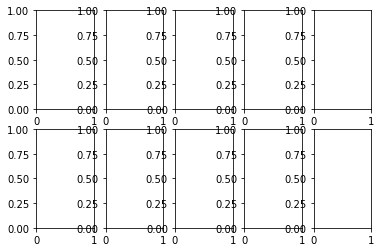

In [11]:
fig, axes = plt.subplots(2,5)

